### Import necessary packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import matplotlib
from scipy.interpolate import make_interp_spline, BSpline
import datetime
from collections import Counter

### Define helper functions

In [2]:
colors_lst = 'kgby' # list of colors
def Colors(l):  
    """Generator for colors"""
    for n in l:
        yield n
        
def tweets_per_time_unit(nb_tweets, nb_days, unit='day'):
    if unit == 'day':
        ans = nb_tweets/nb_days
        print("There are {} tweets per day.".format(ans))
        print("1 tweet is sent every {} minute.".format((24*60)/ans))
        print("1 tweet is sent every {} second.".format((24*60*60)/ans))        
        return ans

### Get data from Twitter with twint

$twint -s "#XAI" -o xai-hashtag.csv --csv

$twint -s "#AI" -o xai-hashtag.csv --csv

### Get data about topic search from Google Trends

download data from the site: https://trends.google.com/trends/explore?date=today%205-y&q=%2Fg%2F11fxvbm8wd

## Google Trends data charts

In [3]:
def single_chart_gtrends(filename, frag, vertical_annots, trend=False):
    df = pd.read_csv(filename, header=1)
    
    colors = Colors(colors_lst)
    
    for col in df.columns:
        if col != 'Month':
            df[col] = df[col].apply(lambda x: 0 if x == '<1' else x).astype('int')
            
    matplotlib.rcParams.update({'font.size': 22})
    plt.figure(figsize=(17,10))
    
    for col in df.columns:
        if col != 'Month':
            plt.plot(df['Month'][-frag:], df[col][-frag:], label=col.split(':')[0], linewidth=7)
    
    plt.xticks(rotation=80)
    plt.xticks(df['Month'][-frag::12],[x.split('-')[0] for x in df['Month'][-frag::12]])

    if trend:
        for col in df.columns:
            if col != 'Month':
                back = 60
                z = np.polyfit(range(0,back), df[col][-back:], 1)
                p = np.poly1d(z)
                plt.plot(df['Month'][-back:],p([i for i, x in enumerate(df['Month'][-back:])]),"r--", label="", linewidth=7)

    
    for annot in vertical_annots:
        plt.axvline(x=vertical_annots[annot], color=next(colors), linestyle='--', label=annot, linewidth=4)
    plt.xlabel("")
    plt.ylabel("Interest over time")
    plt.title("Search Terms")
    plt.legend(frameon=False)
    plt.box(False)
    plt.show()

### Important events

In [4]:
dl_article = '2015-05'
gdpr_intro = '2016-04'
gdpr_implementation = '2018-05'

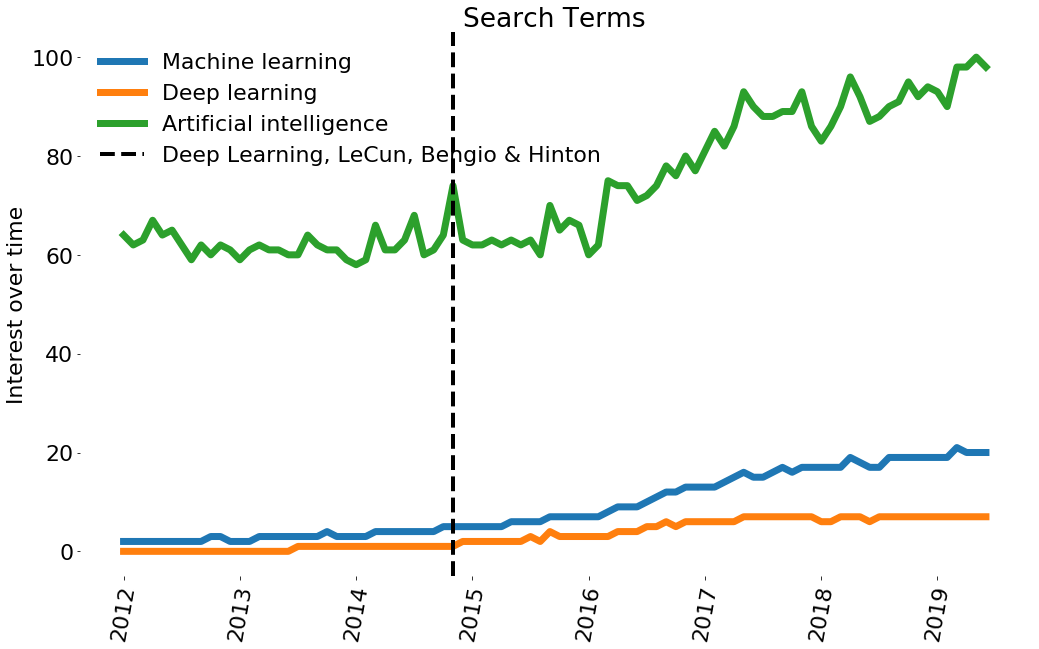

In [5]:
df = single_chart_gtrends('./data/multiTimeline-ml-dl-ai-worldwide.csv', 90, {'Deep Learning, LeCun, Bengio & Hinton': dl_article})

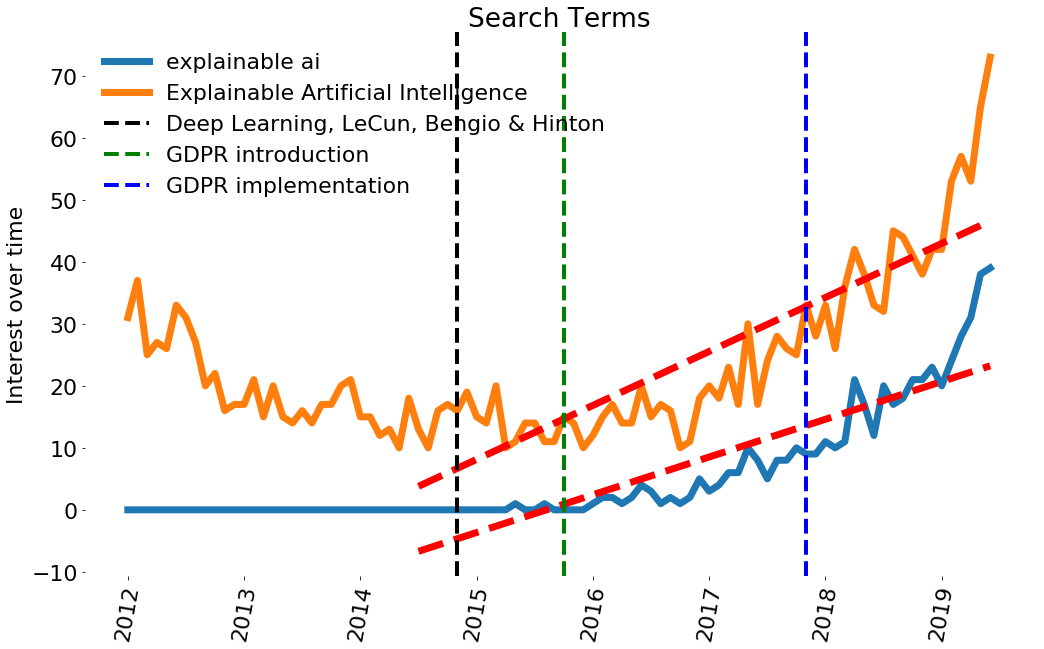

In [6]:
vertical_annots = {'Deep Learning, LeCun, Bengio & Hinton': dl_article, 'GDPR introduction': gdpr_intro, 'GDPR implementation' : gdpr_implementation}
df = single_chart_gtrends('./data/multiTimeline-xai-trends.csv', 90, vertical_annots, trend=True)

## Twitter data charts

In [7]:
def single_chart_tweets(filename, frag, vertical_annots, name, trend=False, simple=False):
    
    colors = Colors(colors_lst)
    
    df = pd.read_csv(filename)

    matplotlib.rcParams.update({'font.size': 22})        
    plt.figure(figsize=(17,10))
    
    # Convert raw data into counts
    cnt = Counter(df['date'])
    
    if not simple:
        dates = list(set(['-'.join(x.split('-')[:2]) for x in cnt.keys() if type(x) is str]))
        dates = sorted(dates)
        values = []
        for date in dates:
            val = sum([cnt[x] for x in cnt.keys() if type(x) is str and '-'.join(x.split('-')[:2]) == date])
            values.append(val)

        plt.plot(dates, values, label='Tweets: #xai', linewidth=7 )
        plt.xticks(dates[::12],[x.split('-')[0] for x in dates[::12]])
        tweets_per_time_unit(sum(values), len(values))
    else:
        plt.plot(cnt.keys(),cnt.values())
        tweets_per_time_unit(sum(cnt.values()), len(cnt))
                
    plt.xticks(rotation=80)
            
    if trend:
        back = 60
        z = np.polyfit(range(0,back), values[-back:], 1)
        p = np.poly1d(z)
        plt.plot(dates[-back:],p([i for i, x in enumerate(dates[-back:])]),"r--", label="", linewidth=7)

    
    for annot in vertical_annots:
        plt.axvline(x=vertical_annots[annot], color=next(colors), linestyle='--', label=annot, linewidth=4)
    

    plt.title("Tweets for hashtag: {}".format(name))
    plt.ylabel("counts per month")
    plt.legend(frameon=False)
    plt.box(False)
    plt.show()

There are 67.62903225806451 tweets per day.
1 tweet is sent every 21.292630574767472 minute.
1 tweet is sent every 1277.5578344860483 second.


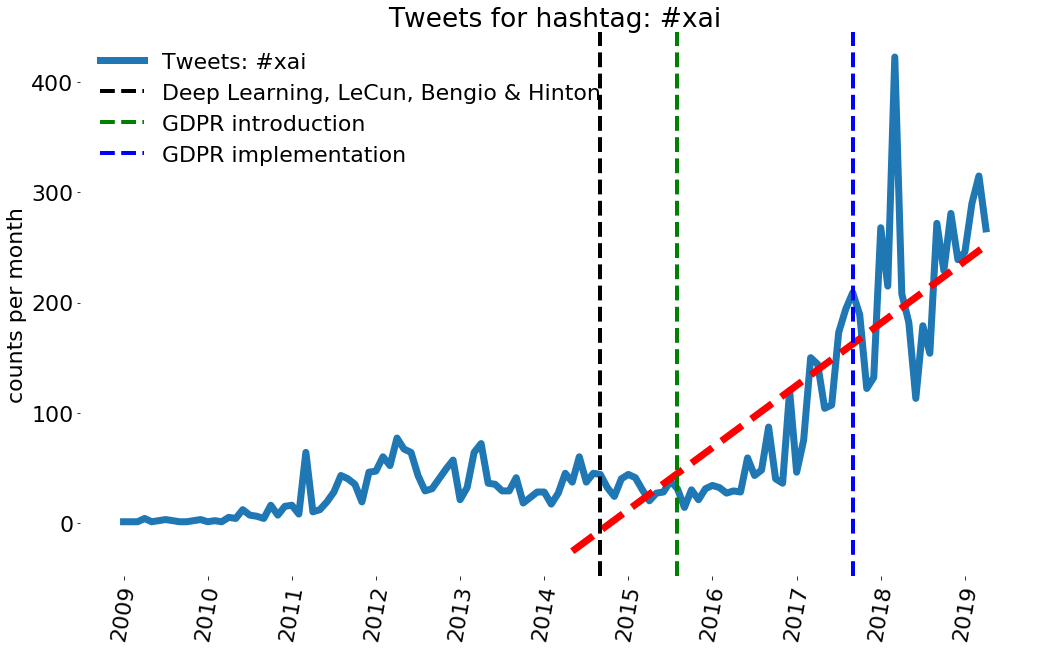

In [8]:
single_chart_tweets('./data/xai-hashtag.csv', 0, vertical_annots,'#xai', trend=True)

/home/adri/anaconda3/envs/python3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3191: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):
No handles with labels found to put in legend.


There are 6769.476190476191 tweets per day.
1 tweet is sent every 0.212719560492125 minute.
1 tweet is sent every 12.7631736295275 second.


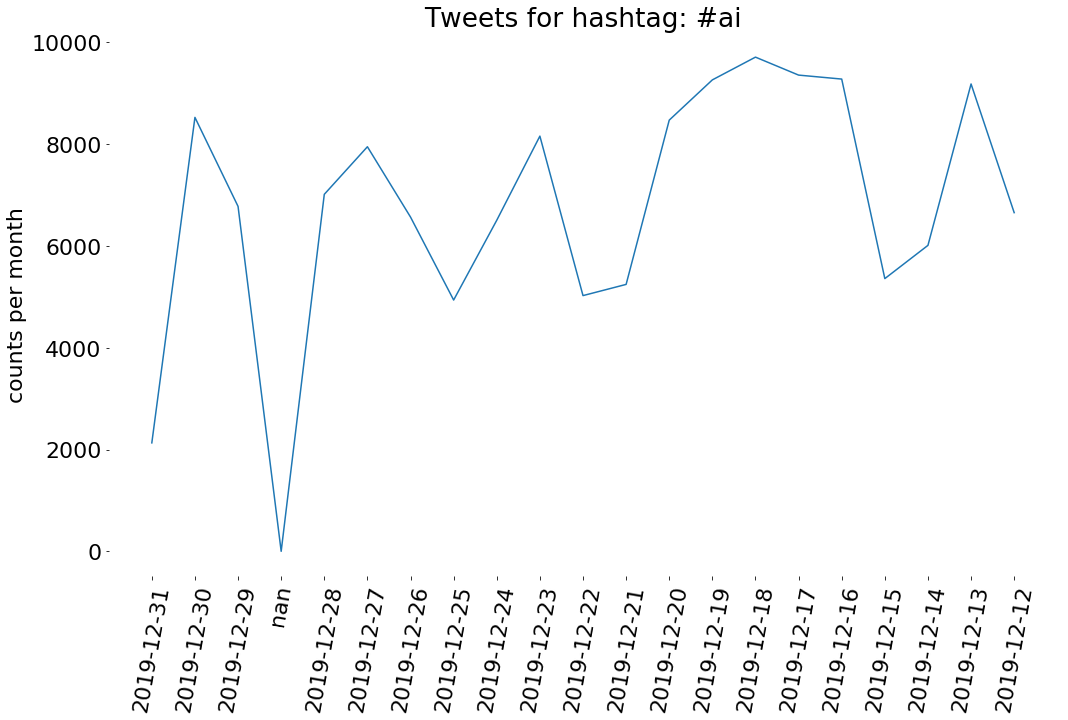

In [9]:
single_chart_tweets('./data/ai-hashtag11Dec-1.csv', 0, {}, "#ai", trend=False, simple=True)

## Combined data chart

In [10]:
def combined_charts_gtrends_tweets(filename1, filename2, vertical_annots, simple=False, trend=False):
    fig, ax1 = plt.subplots(figsize=(17,10))

    colors_list = ['#bfc9ca', '#abebc6', '#85c1e9']
    colors = Colors(colors_list)
    
    df = pd.read_csv(filename1)

    matplotlib.rcParams.update({'font.size': 22})        

    cnt = Counter(df['date'])
    

    dates = list(set(['-'.join(x.split('-')[:2]) for x in cnt.keys() if type(x) is str]))
    dates = sorted(dates)
    values = []
    for date in dates:
        val = sum([cnt[x] for x in cnt.keys() if type(x) is str and '-'.join(x.split('-')[:2]) == date])
        values.append(val)

    ax1.plot(dates[-90:], values[-90:], 'y', label='Tweets: #xai', linewidth=4)
    for annot in vertical_annots:
        ax1.axvline(x=vertical_annots[annot], color=next(colors), linestyle='--', label=annot, linewidth=4)

                            
    if trend:
        back = 60
        z = np.polyfit(range(0,back), values[-back:], 1)
        p = np.poly1d(z)
        ax1.plot(dates[-back:],p([i for i, x in enumerate(dates[-back:])]),"r--", label="", linewidth=7)

    ax2 = ax1.twinx()
    frag = 90
    color2 = '#2471a3'

    dt = pd.read_csv(filename2, header=1)
        
    for col in dt.columns:
        if col != 'Month':
            dt[col] = dt[col].apply(lambda x: 0 if x == '<1' else x).astype('int')
                
    if trend:
        for col in dt.columns:
            if col != 'Month':
                back = 60
                z = np.polyfit(range(0,back), dt[col][-back:], 1)
                p = np.poly1d(z)
                ax2.plot(dt['Month'][-back:],p([i for i, x in enumerate(dt['Month'][-back:])]),"r--", label="", linewidth=7)

    ax2.plot(dt['Month'][-frag:], dt['Explainable Artificial Intelligence: (Worldwide)'][-frag:],color=color2, label='Explainable Artificial Intelligence', linewidth=4) 
    back = 60
    z = np.polyfit(range(0,back), dt['Explainable Artificial Intelligence: (Worldwide)'][-back:], 1)
    p = np.poly1d(z)
    ax2.plot(dt['Month'][-back:],p([i for i, x in enumerate(dt['Month'][-back:])]),"#f1948f", label="trendline", linewidth=8)
    ax1.set_xticks(dates[-90::12])
    ax1.set_xticklabels([x.split('-')[0] for x in dates[-90::12]],rotation=80)

    ax1.set_ylabel("tweets count",color='y')        

    ax2.set_ylabel("interest rate",color=color2)
    ax1.legend(frameon=False)
    ax1.tick_params(axis='y', labelcolor='y')
    ax2.tick_params(axis='y', labelcolor=color2)
    ax1.set(frame_on=False)
    ax2.set(frame_on=False)
    ax2.legend(frameon=False,loc='upper right')
    plt.box(False)
    fig.tight_layout()
    plt.show()

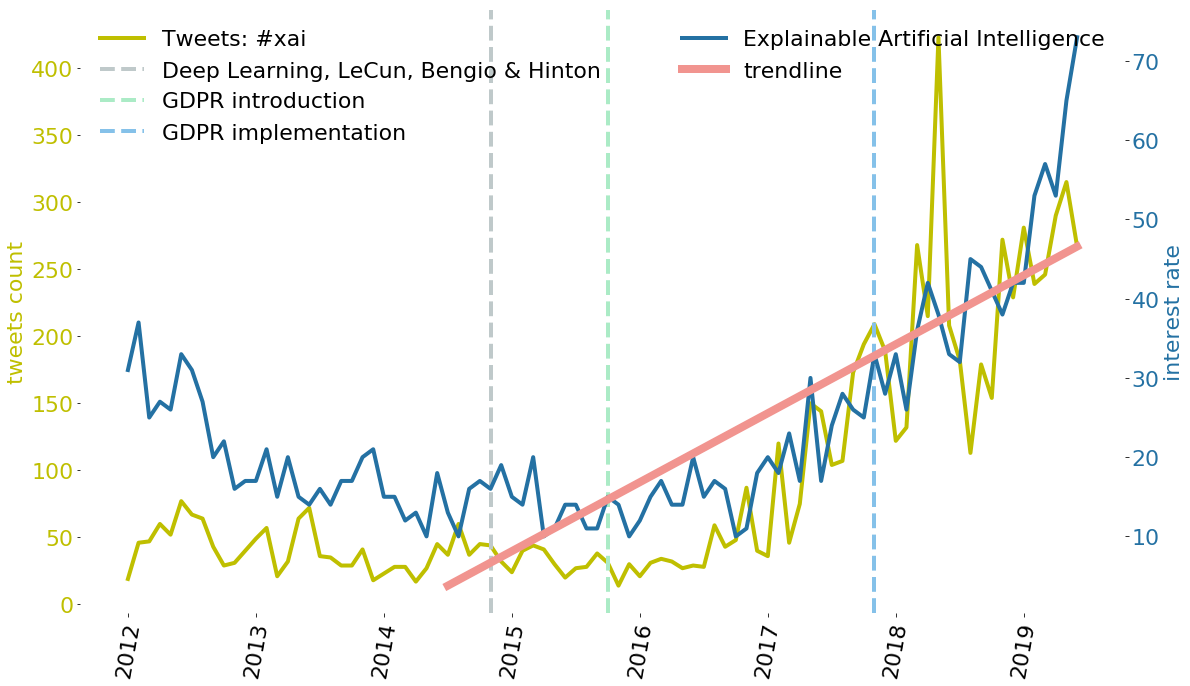

In [11]:
combined_charts_gtrends_tweets('./data/xai-hashtag.csv', './data/multiTimeline-xai-trends.csv', vertical_annots)